In [7]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 9, 6
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 500

save_figures_to_latex = False
figures_path = '/home/tellocam/Projects/HPC/Exercise_2/latex_ex_2/figures'


In [8]:
txt_files = glob.glob("EX2_*.txt")

df_dict = {}
for file in txt_files:
    df = pd.read_csv(file, sep=',', header=None)
    df.rename(columns={0:"Count", 1:"Bytes", 2:"Average", 3:"Min", 4:"Median", 5:"Stddev", 6:"CI"}, inplace=True)
    df_dict[file] = df

legend_dict = df_dict.copy()
for key in legend_dict:
    legend_dict[key] = key
    legend_dict[key] = legend_dict[key].replace('EX2_', '')
    legend_dict[key] = legend_dict[key].replace('.txt', '')
    legend_dict[key] = legend_dict[key].replace('_', ' ')

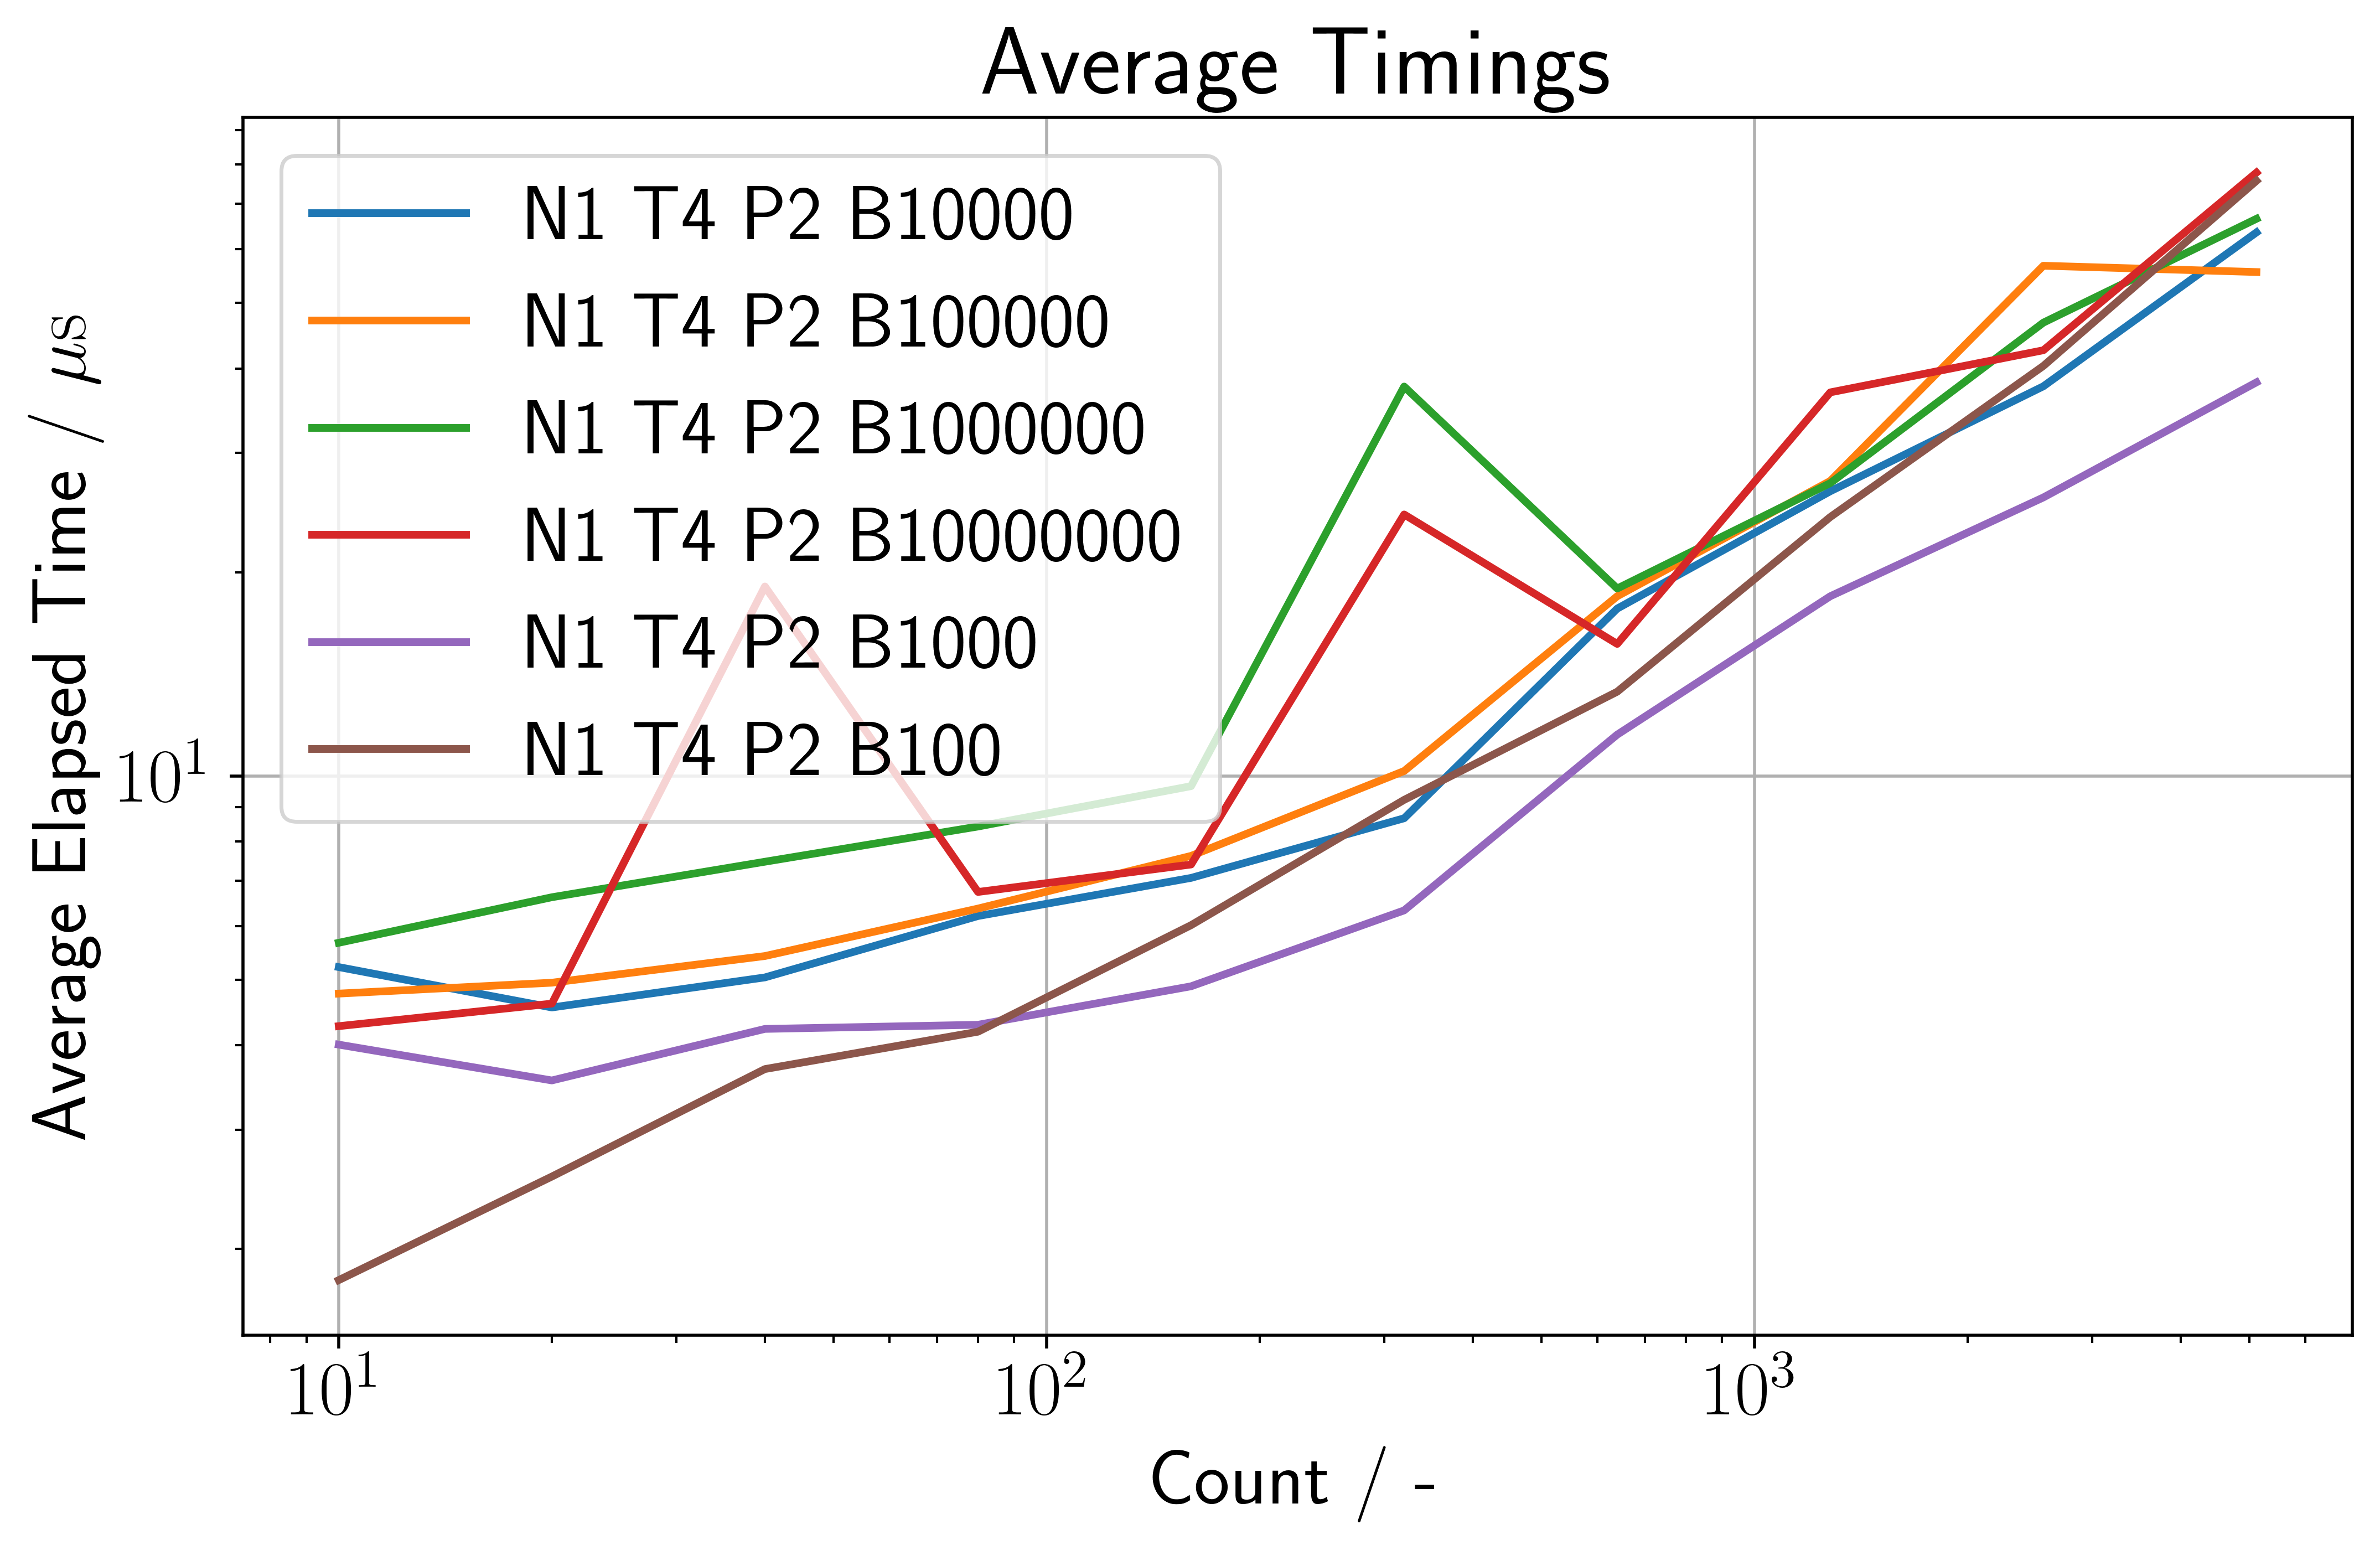

In [10]:
plot_x = 'Count'
plot_y = 'Average'
cond_1 = 'N1'
cond_2 = 'T4'
cond_3 = 'P2'

plt.figure(1)
plt.grid()

for key in df_dict.keys():
    legend_entry = str(key)
    if cond_1 in key and cond_2 in key and cond_3 in key:
        plot_df = df_dict.get(key)
        plt.loglog(plot_df[plot_x], plot_df[plot_y], label=legend_dict[key], linewidth = 2)
    del legend_entry

plt.legend()
plt.xlabel( plot_x + ' / -')
plt.ylabel(plot_y +' Elapsed Time / $\mu \mathrm{s}$')
plt.title(plot_y + ' Timings')
plt.tight_layout()

if(save_figures_to_latex==True):
    plt.savefig(figures_path + '/Ex2_' + cond_1 + '_' + cond_2 + '.pdf')

del plot_x, plot_y, cond_1, cond_2, cond_3